In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import pyfolio as pf
from datetime import datetime

In [23]:
data_path = r"data.csv"

#  Strategy 1

invest 1 dollar whenever machine learning predicts a win

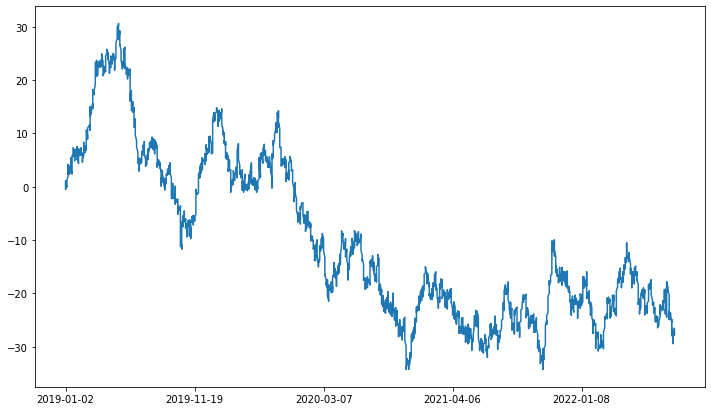

In [24]:
f = pd.read_csv(data_path)
# Invest 1 dolloar whever wonprob is greater than 0.5
f.loc[:, "home_bet_total"] = f.loc[:, "home_predict_winprob"].apply(lambda x: 1 if (x>0.5) else 0)
f.loc[:, "away_bet_total"] = f.loc[:, "away_predict_winprob"].apply(lambda x: 1 if (x>0.5) else 0)


# Create booleans for if home team loses
f.loc[:, "home_lose"] = abs(f.loc[:, "home_win"] - 1)

# Calculate how much portion of money gained when win or lose
# when betted team win, we gain money according to moneyline as shown below:
f.loc[:, "home_win_gain"] = f.loc[:, "money_line_home"].apply(lambda x: x/100 if x >=0 else 100/abs(x) )
f.loc[:, "away_win_gain"] = f.loc[:, "money_line_away"].apply(lambda x: x/100 if x >=0 else 100/abs(x) )

# when betted team lose, we lose all money
f.loc[:, "home_lose_gain"] = -1
f.loc[:, "away_lose_gain"] = -1

# calculate earning
f.loc[:, "home_bet_earning"] = f.loc[:, "home_win"] * f.loc[:, "home_win_gain"] * f.loc[:, "home_bet_total"]
f.loc[:, "home_bet_earning"] += f.loc[:, "home_lose"] * f.loc[:, "home_lose_gain"] * f.loc[:, "home_bet_total"]

f.loc[:, "away_bet_earning"] = f.loc[:, "home_lose"] * f.loc[:, "away_win_gain"] * f.loc[:, "away_bet_total"]
f.loc[:, "away_bet_earning"] += f.loc[:, "home_win"] * f.loc[:, "away_lose_gain"] * f.loc[:, "away_bet_total"]

f.loc[:, "bet_earning_sum"] = f.loc[:, "home_bet_earning"]  + f.loc[:, "away_bet_earning"]

# calculate acculated sum
f.loc[:, "bet_earning_cum_sum"] = f.loc[:, "bet_earning_sum"].cumsum()

# plot accumulated sum
import numpy as np
xticks = np.arange(0, len(f), 100)
fig, ax = plt.subplots(1,1, figsize=(12,7))
ax.set_xticks(xticks)
ax.plot(f.datetime, f.bet_earning_cum_sum)

#print("average investment per game= {}".format(np.mean(f.loc[:, "home_bet_total"].mean())))

#  Strategy 2

invest 1 dollar multipled by kelly criteria

In [25]:
def calc_winprob(odds):
    if odds >= 0:
        return round(100/(odds+100), 2)
    else:
        return round(1 - 100/(-odds+100), 2)

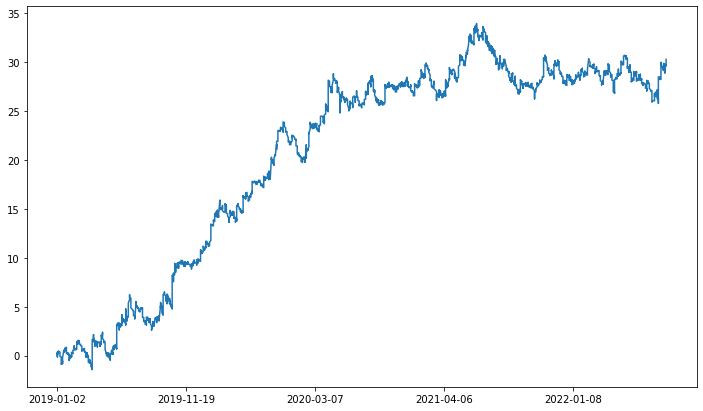

In [26]:
f = pd.read_csv(data_path)
# caculate how much money to bet according to kelly criteria
f.loc[:, "actual_home_winprob"] = f.loc[:, "money_line_home"].apply(calc_winprob)
f.loc[:, "actual_away_winprob"] = f.loc[:, "money_line_away"].apply(calc_winprob)
f.loc[:, "kelly_home"] = (((1 - f.loc[:, "actual_home_winprob"]) / f.loc[:, "actual_home_winprob"]) * f.loc[:, "home_predict_winprob"] - (1 - f.loc[:, "home_predict_winprob"])) / (
                    (1 - f.loc[:, "actual_home_winprob"]) / f.loc[:, "actual_home_winprob"])

f.loc[:, "kelly_away"] = (((1 - f.loc[:, "actual_away_winprob"]) / f.loc[:, "actual_away_winprob"]) * f.loc[:, "away_predict_winprob"] - (1 - f.loc[:, "away_predict_winprob"])) / (
                    (1 - f.loc[:, "actual_away_winprob"]) / f.loc[:, "actual_away_winprob"])

f.loc[:, "kelly_home"] = f.loc[:, "kelly_home"].apply(lambda x: x if x > 0.0 else 0)
f.loc[:, "kelly_away"] = f.loc[:, "kelly_away"].apply(lambda x: x if x > 0.0 else 0)

#f.loc[:, "kelly_home"] = f.loc[:, "kelly_home"].apply(lambda x: 0.15 if x > 0.15 else x)
#f.loc[:, "kelly_away"] = f.loc[:, "kelly_away"].apply(lambda x: 0.15 if x > 0.15 else x)

# Invest 1 multipled by kelly calculated result
f.loc[:, "home_bet_total"] = f.loc[:, "kelly_home"]
f.loc[:, "away_bet_total"] = f.loc[:, "kelly_away"]



# Create booleans for if home team loses
f.loc[:, "home_lose"] = abs(f.loc[:, "home_win"] - 1)

# Calculate how much portion of money gained when win or lose
# when betted team win, we gain money according to moneyline as shown below:
f.loc[:, "home_win_gain"] = f.loc[:, "money_line_home"].apply(lambda x: x/100 if x >=0 else 100/abs(x) )
f.loc[:, "away_win_gain"] = f.loc[:, "money_line_away"].apply(lambda x: x/100 if x >=0 else 100/abs(x) )

# when betted team lose, we lose all money
f.loc[:, "home_lose_gain"] = -1
f.loc[:, "away_lose_gain"] = -1

# calculate earning
f.loc[:, "home_bet_earning"] = f.loc[:, "home_win"] * f.loc[:, "home_win_gain"] * f.loc[:, "home_bet_total"]
f.loc[:, "home_bet_earning"] += f.loc[:, "home_lose"] * f.loc[:, "home_lose_gain"] * f.loc[:, "home_bet_total"]

f.loc[:, "away_bet_earning"] = f.loc[:, "home_lose"] * f.loc[:, "away_win_gain"] * f.loc[:, "away_bet_total"]
f.loc[:, "away_bet_earning"] += f.loc[:, "home_win"] * f.loc[:, "away_lose_gain"] * f.loc[:, "away_bet_total"]

f.loc[:, "bet_earning_sum"] = f.loc[:, "home_bet_earning"]  + f.loc[:, "away_bet_earning"]

# calculate acculated sum
f.loc[:, "bet_earning_cum_sum"] = f.loc[:, "bet_earning_sum"].cumsum()

# plot accumulated sum
import numpy as np
xticks = np.arange(0, len(f), 100)
fig, ax = plt.subplots(1,1, figsize=(12,7))
ax.set_xticks(xticks)
ax.plot(f.datetime, f.bet_earning_cum_sum)


#print("average investment per game= {}".format(np.mean(f.loc[:, "home_bet_total"].mean())))